## <span style="color:green">Финальный комментарий<span>
    Спасибо за проделанную работу🤝
    
    Поздравляю, проект принят👍

----------

## Комментарий ревьювера

Алексей, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект.

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

Спасибо за проделанную работу, проверял с удовольствие🤝

Отдельное спасибо за проверку односторонней гипотезы по выручке👍 Отличное решение, не включать пользователей, использовавших тариф не полный месяц.

Есть маленький недочет по оформлению:
_«Появился график - создаем заголовок и человекочитаемые и понятные подписи для осей, с указанием единиц измерения. Не забывай, что у графика две координатных оси»_

Дооформляй и отправляй на проверку⚙️

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:
## <span style="color:green">Отличная работа<span>
    Безупречная работа
## <span style="color:orange">Что можно улучшить<span>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить.
## <span style="color:red">Что нужно доработать<span>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.
 
Не удаляй комментарии, так будем следить за динамикой =)
   
    
Поехали! :)

---------

<font color='purple'> Привет. Выделил справления фиолетовым цветом, чтобы было легче заметить.</font>

# Определение перспективного тарифа для телеком компании

## Описание проекта
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1 Изучение общей информации

Откроем файлы с данными и изучим информацию.

<font color='purple'>Импортируем pandas.</font>

In [1]:
import pandas as pd

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


## <span style="color:orange">Что можно улучшить<span>
Логичнее отделять импорт библиотек от основного кода

Таблица calls (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

<font color='purple'>Импортируем с указанием индекса.</font>

In [3]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [4]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [6]:
users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Таблица users (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Пропущенных значений практически не наблюдается, качество данных проверим на этапе предобработки.

После этапа предобработки создадим сборный датасет для проведения анализа.

## 2 Предобработка данных

### 2.1 Предобработка датасета calls

Проверим наличие дубликатов и пропусков.

In [7]:
print('Количество дубликатов', calls.duplicated().sum())

Количество дубликатов 0


In [8]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Дубликатов и пропусков не обнаружено.

Просмотрим общую информацию о таблице.

In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Приведём столбец **call_date** к datetime.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Произведём проверку.

In [11]:
calls.head(2)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Проверим адекватность данных.

In [13]:
calls.describe(include='all')

,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607.000000
unique,202607,365,NaN,NaN
top,1138_84,2018-12-31 00:00:00,NaN,NaN
freq,1,1435,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,6.755887,1253.940619
std,NaN,NaN,5.843365,144.722751
min,NaN,NaN,0.000000,1000.000000
25%,NaN,NaN,1.300000,1126.000000


Минимальное значение длительности 0 минут, это могут быть пропущенные звонки. Для уточнения необходимо связаться со специалистами, которые выдали данные. 

Так как нет возможности связаться со специалистами, то примем нулевые звонки за пропущенные и удалим их из датасета

In [14]:
calls = calls.query('duration > 0')

Произведём округление значений в бόльшую сторону, так как «Мегалайн» всегда округляет вверх значения минут.

<font color='purple'>Импортируем numpy.</font>

In [15]:
import numpy as np

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil)

Проверка результата.

In [17]:
calls.describe()

,duration,user_id
count,162994.000000,162994.000000
mean,8.897880,1254.149877
std,5.353761,144.751050
min,1.000000,1000.000000
25%,5.000000,1126.000000
50%,8.000000,1261.000000
75%,12.000000,1379.000000
max,38.000000,1499.000000


Среднее время длительности звонка выросло на 2 минуты. Предобработка завершена.

### 2.2 Предобработка датасета internet

Проверим наличие дубликатов и пропусков.

In [18]:
print('Количество дубликатов', internet.duplicated().sum())

Количество дубликатов 0


In [19]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Дубликатов и пропусков не обнаружено.

Просмотрим общую информацию о таблице.

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


<s>Столбец **Unnamed: 0** не имеет смысла, удалим его.</s>

In [21]:
# internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

## <span style="color:orange">Что можно улучшить<span>
Столбец `Unnamed:0` - появляется, когда данные были сохранены с индексом, чтобы он не появлялся, достаточно указать аргумент `index_col`, `pd.read_csv(filepath, index_col=0)`

Столбец **session_date** приведем к datetime.

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Произведём проверку.

In [23]:
internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


Проверим адекватность данных.

In [25]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [26]:
internet['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Минимальный объём потраченного траффика равен 0 Мб. Это может быть телеметрическая информация, которая крайне мала для оценки в мегабайтах. Так как количество такой информации крайне мало, то она не повлияет на оценку рентабельности тарифов. Удалим столбцы с нулевым траффиком.

In [27]:
internet = internet.query('mb_used > 0')

Проверка результата.

In [28]:
internet.describe()

,mb_used,user_id
count,129798.000000,129798.000000
mean,426.087210,1253.046318
std,255.596447,143.782672
min,0.030000,1000.000000
25%,227.460000,1132.000000
50%,400.540000,1252.000000
75%,592.947500,1380.000000
max,1724.830000,1499.000000


Несмотря на фразу в техническом задании "«Мегалайн» всегда округляет вверх значения минут и **мегабайтов**", я надеюсь, что в компании не работают садисты,  и округление до мегабайтов происходит по итогам месяца, а не сессии.

## <span style="color:orange">Комментарий<span>
😀

На заре эпохи мобильных операторов, округлялись сессии...

Средний объём траффика вырос на 126 мегабайт. Предобработка завершена.

### 2.3 Предобработка датасета messages

Проверим наличие дубликатов и пропусков.

In [29]:
print('Количество дубликатов', messages.duplicated().sum())

Количество дубликатов 0


In [30]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Дубликатов и пропусков не обнаружено.

Просмотрим общую информацию о таблице.

In [31]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Приведём столбец **message_date** к datetime.

In [32]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Произведём проверку.

In [33]:
messages.head(2)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


In [34]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Проверим адекватность данных.

In [35]:
messages.describe(include='all')

,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1344_394,2018-12-31 00:00:00,NaN
freq,1,859,NaN
first,NaN,2018-01-02 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000


In [36]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Проверять особо нечего. Предобработка завершена.

### 2.4 Предобработка датасета tariffs

Проверим типы данных.

In [37]:
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [38]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные в предобработке не нуждаются.

### 2.5 Предобработка датасета users

Проверим наличие дубликатов и пропусков.

In [39]:
print('Количество дубликатов', users.duplicated().sum())

Количество дубликатов 0


In [40]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Дубликаты не обнаружены.

Как известно из описания данных, пропуски в столбце **churn_date** означают, что пользователь продолжает пользоваться тарифом. Данные из столбца можно использовать для оценки помесячной выручки с абонента. Для этого из даты ухода будем вычитать дату подключения.

Заполним пропуски **churn_date** датой следующего отчетного года (чтобы правильно рассчитать длительность дней подключения).

In [41]:
users["churn_date"].fillna("2019-01-01", inplace=True)

Проверка.

In [42]:
users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

Просмотрим общую информацию о таблице.

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Приведём столбцы **churn_date** и **reg_date**  к типу datetime.

In [44]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Проверка.

In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Проверка данных таблицы.

In [46]:
users.describe(include='all')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000000,500.00000,500,500,500,500,500,500
unique,NaN,NaN,34,76,246,419,270,2
top,NaN,NaN,2019-01-01 00:00:00,Москва,Радим,Андреенко,2018-05-28 00:00:00,smart
freq,NaN,NaN,462,99,6,5,8,351
first,NaN,NaN,2018-08-17 00:00:00,NaN,NaN,NaN,2018-01-01 00:00:00,NaN
last,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,2018-12-31 00:00:00,NaN
mean,1249.500000,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN


Смущает дата подключения 2018-12-31, она совпадает с последними действиями в базе. Отфильтруем данные по длительности подключения позже.


Предобработка завершена.

### 2.6 Подготовка общей таблицы

#### 2.6.1 Разбиение calls на периоды оплаты

Добавим в датасет calls данные о дате регистрации пользователя.

In [47]:
new_calls = calls.merge(users[['user_id', 'reg_date']], on='user_id', how='left')

Выведем в отдельные столбцы день, месяц звонка и день регистрации.

In [48]:
new_calls['month'] = pd.DatetimeIndex(new_calls['call_date']).month
new_calls['day'] = pd.DatetimeIndex(new_calls['call_date']).day
new_calls['reg_day'] = pd.DatetimeIndex(new_calls['reg_date']).day

In [49]:
new_calls.head()

,id,call_date,duration,user_id,reg_date,month,day,reg_day
0,1000_2,2018-06-11,3.0,1000,2018-05-25,6,11,25
1,1000_3,2018-09-21,14.0,1000,2018-05-25,9,21,25
2,1000_4,2018-12-15,6.0,1000,2018-05-25,12,15,25
3,1000_7,2018-08-22,19.0,1000,2018-05-25,8,22,25
4,1000_8,2018-09-15,19.0,1000,2018-05-25,9,15,25


Выведем правило, по которому будем считать расчётный месяц.

Обычно день заключения договора является днём, в который идёт списание ежемесячной платы, а если день месяца, в который произошо заключение договора больше, чем количество дней в расчётном месяце, то плата взымается в последний день месяца. Будем считать эту информацию как данность, одноко, лучше информацию уточнить у оператора.

По вышеописанной информации выведем функцию.

<font color='purple'>Импортируем calendar.</font>

In [50]:
import calendar

In [51]:
def call_month(row):
    # если день заключения договора больше, чем количество дней в календарном месяце
    if  row['reg_day'] >= calendar.monthrange(2018, row['month'])[1]:
        # то оставляем расчётным месяцем текущий
        return row['month']
    else:
        # если день совершения действия меньше чем, день заключения договора, то причисляем к предыдущему календарному месяцу
        if row['day'] < row['reg_day']:
            return (row['month'] - 1)
        else:
            # следующие дни после дня заключения договора идут в текущий календарный месяц
            return row['month']
 
new_calls['pay_month'] = new_calls.apply(call_month, axis=1)

In [52]:
new_calls.head(3)

,id,call_date,duration,user_id,reg_date,month,day,reg_day,pay_month
0,1000_2,2018-06-11,3.0,1000,2018-05-25,6,11,25,5
1,1000_3,2018-09-21,14.0,1000,2018-05-25,9,21,25,8
2,1000_4,2018-12-15,6.0,1000,2018-05-25,12,15,25,11


In [53]:
new_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 0 to 162993
Data columns (total 9 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
reg_date     162994 non-null datetime64[ns]
month        162994 non-null int64
day          162994 non-null int64
reg_day      162994 non-null int64
pay_month    162994 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 12.4+ MB


По полученным данных некоторые абоненты пользовались услугами значительно менее месяца в 12 расчётном месяце, поэтому оценивать их траты некорректно. Исключим из столбца значения 12 месяца с длительностью периода до 28 дней.

In [54]:
# исключаем из 12 месяца, если день ежемесячной платы позже чем 3 число
user_calls = new_calls.query('pay_month < 12 or (pay_month > 11 and reg_day < 3)')
# исключаем из 12 месяца, если день заключения договора позже чем 2018-12-3
user_calls = user_calls[user_calls['reg_date'] < '2018-12-3']

In [55]:
print('После фильтрации таблица уменьшилась на {:.2%}.'.format(1-(len(user_calls)/len(new_calls))))
user_calls.head(3)

После фильтрации таблица уменьшилась на 7.87%.


,id,call_date,duration,user_id,reg_date,month,day,reg_day,pay_month
0,1000_2,2018-06-11,3.0,1000,2018-05-25,6,11,25,5
1,1000_3,2018-09-21,14.0,1000,2018-05-25,9,21,25,8
2,1000_4,2018-12-15,6.0,1000,2018-05-25,12,15,25,11


In [56]:
user_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150161 entries, 0 to 162993
Data columns (total 9 columns):
id           150161 non-null object
call_date    150161 non-null datetime64[ns]
duration     150161 non-null float64
user_id      150161 non-null int64
reg_date     150161 non-null datetime64[ns]
month        150161 non-null int64
day          150161 non-null int64
reg_day      150161 non-null int64
pay_month    150161 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 11.5+ MB


Вычислим количество и суммарную длительность звонков в месяц для каждого абонента.

In [57]:
calls_table = user_calls.groupby(['user_id','pay_month'], as_index=True).duration.agg(['sum', 'count']).reset_index()

In [58]:
calls_table.head(15)

,user_id,pay_month,sum,count
0,1000,5,299.0,40
1,1000,6,284.0,35
2,1000,7,403.0,44
3,1000,8,482.0,47
4,1000,9,368.0,41
5,1000,10,341.0,43
6,1000,11,340.0,38
7,1001,11,430.0,45
8,1001,12,414.0,47
9,1002,6,220.0,24


Переименуем столбцы.

In [59]:
right_columns = ['user_id', 'pay_month', 'call_duration', 'call_count']
calls_table.set_axis(right_columns, axis='columns', inplace=True)

In [60]:
calls_table.head(2)

,user_id,pay_month,call_duration,call_count
0,1000,5,299.0,40
1,1000,6,284.0,35


In [61]:
calls_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 4 columns):
user_id          2726 non-null int64
pay_month        2726 non-null int64
call_duration    2726 non-null float64
call_count       2726 non-null int64
dtypes: float64(1), int64(3)
memory usage: 85.3 KB


Создадим общую таблицу для звонков.

In [62]:
all_calls = users.merge(calls_table, how='left')

In [63]:
all_calls.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_month,call_duration,call_count
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,299.0,40.0
1,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,284.0,35.0
2,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,403.0,44.0
3,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,482.0,47.0
4,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,368.0,41.0
5,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,341.0,43.0
6,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,340.0,38.0
7,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,11.0,430.0,45.0
8,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,12.0,414.0,47.0
9,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,220.0,24.0


In [64]:
all_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2763
Data columns (total 11 columns):
user_id          2764 non-null int64
age              2764 non-null int64
churn_date       2764 non-null datetime64[ns]
city             2764 non-null object
first_name       2764 non-null object
last_name        2764 non-null object
reg_date         2764 non-null datetime64[ns]
tariff           2764 non-null object
pay_month        2726 non-null float64
call_duration    2726 non-null float64
call_count       2726 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 259.1+ KB


В новых столбцах меньше строк. Видимо, не все абоненты совершали звонки.

Данные добавлены

#### 2.6.2 Разбиение internet на периоды оплаты

Проводём действия аналогичные пункту **2.6.1**.

In [65]:
# напоминаем себе название стоблцов и их содержимое
internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


In [66]:
# добавляем новый столбец
new_internet = internet.merge(users[['user_id', 'reg_date']], on='user_id', how='left')
# формируем новые столбцы
new_internet['month'] = pd.DatetimeIndex(new_internet['session_date']).month
new_internet['day'] = pd.DatetimeIndex(new_internet['session_date']).day
new_internet['reg_day'] = pd.DatetimeIndex(new_internet['reg_date']).day
# создаём столбец с расчётным месяцем
new_internet['pay_month'] = new_internet.apply(call_month, axis=1)
# исключаем из 12 месяца, если день ежемесячной платы позже чем 3 число
user_internet = new_internet.query('pay_month < 12 or (pay_month > 11 and reg_day < 3)')
# исключаем из 12 месяца, если день заключения договора позже чем 2018-12-3
user_internet = user_internet[user_internet['reg_date'] < '2018-12-3']
print('После фильтрации таблица уменьшилась на {:.2%}.'.format(1-(len(user_internet)/len(new_internet))))
user_internet.head(3)

После фильтрации таблица уменьшилась на 7.93%.


,id,mb_used,session_date,user_id,reg_date,month,day,reg_day,pay_month
0,1000_0,112.95,2018-11-25,1000,2018-05-25,11,25,25,11
1,1000_1,1052.81,2018-09-07,1000,2018-05-25,9,7,25,8
2,1000_2,1197.26,2018-06-25,1000,2018-05-25,6,25,25,6


In [67]:
user_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119507 entries, 0 to 129797
Data columns (total 9 columns):
id              119507 non-null object
mb_used         119507 non-null float64
session_date    119507 non-null datetime64[ns]
user_id         119507 non-null int64
reg_date        119507 non-null datetime64[ns]
month           119507 non-null int64
day             119507 non-null int64
reg_day         119507 non-null int64
pay_month       119507 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 9.1+ MB


Вычислим суммарный объём интернет-трафика в месяц для каждого абонента.

In [68]:
internet_table = user_internet.groupby(['user_id','pay_month'], as_index=True)['mb_used'].sum().reset_index()

Округлим значения мегабайтов до большего.

In [69]:
internet_table['mb_used'] = internet_table['mb_used'].apply(np.ceil)

In [70]:
internet_table.head(15)

,user_id,pay_month,mb_used
0,1000,5,17822.0
1,1000,6,18728.0
2,1000,7,11441.0
3,1000,8,17145.0
4,1000,9,15713.0
5,1000,10,15499.0
6,1000,11,8650.0
7,1001,11,18430.0
8,1001,12,14037.0
9,1002,6,19276.0


In [71]:
internet_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 3 columns):
user_id      2754 non-null int64
pay_month    2754 non-null int64
mb_used      2754 non-null float64
dtypes: float64(1), int64(2)
memory usage: 64.7 KB


Добавим данные в итоговый датасет.

In [72]:
all_internet = users.merge(internet_table, how='outer')

In [73]:
all_internet.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_month,mb_used
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,17822.0
1,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,18728.0
2,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,11441.0
3,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,17145.0
4,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,15713.0
5,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,15499.0
6,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,8650.0
7,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,11.0,18430.0
8,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,12.0,14037.0
9,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,19276.0


In [74]:
all_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 2786
Data columns (total 10 columns):
user_id       2787 non-null int64
age           2787 non-null int64
churn_date    2787 non-null datetime64[ns]
city          2787 non-null object
first_name    2787 non-null object
last_name     2787 non-null object
reg_date      2787 non-null datetime64[ns]
tariff        2787 non-null object
pay_month     2754 non-null float64
mb_used       2754 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 239.5+ KB


Некоторые абоненты не пользовались интернетом.

Данные добавлены.

#### 2.6.3 Разбиение messages на периоды оплаты

Проводём действия аналогичные пунктам **2.6.1** и **2.6.2**.

In [75]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [76]:
# добавляем новый столбец
new_messages = messages.merge(users[['user_id', 'reg_date']], on='user_id', how='left')
# формируем новые столбцы
new_messages['month'] = pd.DatetimeIndex(new_messages['message_date']).month
new_messages['day'] = pd.DatetimeIndex(new_messages['message_date']).day
new_messages['reg_day'] = pd.DatetimeIndex(new_messages['reg_date']).day
# создаём столбец с расчётным месяцем
new_messages['pay_month'] = new_messages.apply(call_month, axis=1)
# исключаем из 12 месяца, если день ежемесячной платы позже чем 3 число
user_messages = new_messages.query('pay_month < 12 or (pay_month > 11 and reg_day < 3)')
# исключаем из 12 месяца, если день заключения договора позже чем 2018-12-3
user_messages = user_messages[user_messages['reg_date'] < '2018-12-3']
print('После фильтрации таблица уменьшилась на {:.2%}.'.format(1-(len(user_messages)/len(new_messages))))
user_messages.head(3)

После фильтрации таблица уменьшилась на 8.14%.


,id,message_date,user_id,reg_date,month,day,reg_day,pay_month
0,1000_0,2018-06-27,1000,2018-05-25,6,27,25,6
1,1000_1,2018-10-08,1000,2018-05-25,10,8,25,9
2,1000_2,2018-08-04,1000,2018-05-25,8,4,25,7


In [77]:
user_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113027 entries, 0 to 123035
Data columns (total 8 columns):
id              113027 non-null object
message_date    113027 non-null datetime64[ns]
user_id         113027 non-null int64
reg_date        113027 non-null datetime64[ns]
month           113027 non-null int64
day             113027 non-null int64
reg_day         113027 non-null int64
pay_month       113027 non-null int64
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 7.8+ MB


Вычислим суммарное количество сообщений в месяц для каждого абонента.

In [78]:
messages_table = user_messages.groupby(['user_id','pay_month'], as_index=True)['message_date'].count().reset_index()

In [79]:
messages_table.head()

,user_id,pay_month,message_date
0,1000,5,63
1,1000,6,70
2,1000,7,81
3,1000,8,74
4,1000,9,56


Переименуем столбец **message_date**.

In [80]:
messages_table.rename(columns=lambda x: x.replace('_date', '_count'), inplace=True)

In [81]:
messages_table.head()

,user_id,pay_month,message_count
0,1000,5,63
1,1000,6,70
2,1000,7,81
3,1000,8,74
4,1000,9,56


In [82]:
messages_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
user_id          2340 non-null int64
pay_month        2340 non-null int64
message_count    2340 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


Добавим данные в итоговый датасет.

In [83]:
all_messages = users.merge(messages_table, how='outer')

In [84]:
all_messages.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_month,message_count
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,63.0
1,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,70.0
2,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,81.0
3,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,74.0
4,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,56.0


In [85]:
all_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 0 to 2438
Data columns (total 10 columns):
user_id          2439 non-null int64
age              2439 non-null int64
churn_date       2439 non-null datetime64[ns]
city             2439 non-null object
first_name       2439 non-null object
last_name        2439 non-null object
reg_date         2439 non-null datetime64[ns]
tariff           2439 non-null object
pay_month        2340 non-null float64
message_count    2340 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 209.6+ KB


Данные готовы для расчёта выручки.

### 2.7 Создание итогового датафрейма

<font color='purple'>Создаем датафрейм с названием result.</font>

In [86]:
result = all_calls.merge(all_internet, how='outer')
result = result.merge(all_messages, how='outer')

## <span style="color:orange">Что можно улучшить<span>
`all` - встроенная функция языка Python, не следует именовать так пользовательские переменные (https://docs.python.org/3/library/functions.html#all), потому что происходит переопределение этой функции.

Проверим отсутствие неизвестных значений

In [87]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 0 to 2869
Data columns (total 13 columns):
user_id          2870 non-null int64
age              2870 non-null int64
churn_date       2870 non-null datetime64[ns]
city             2870 non-null object
first_name       2870 non-null object
last_name        2870 non-null object
reg_date         2870 non-null datetime64[ns]
tariff           2870 non-null object
pay_month        2764 non-null float64
call_duration    2726 non-null float64
call_count       2726 non-null float64
mb_used          2754 non-null float64
message_count    2340 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 313.9+ KB


Данные о пользователях, заключивших договор после 2018-12-3 не попали в перечень. Удалим их. Также удалим данные с неизвестными месяцами оплаты

In [88]:
result = result[result['reg_date'] < '2018-12-3']
result = result.dropna(subset=['pay_month']).reset_index()

In [89]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 14 columns):
index            2764 non-null int64
user_id          2764 non-null int64
age              2764 non-null int64
churn_date       2764 non-null datetime64[ns]
city             2764 non-null object
first_name       2764 non-null object
last_name        2764 non-null object
reg_date         2764 non-null datetime64[ns]
tariff           2764 non-null object
pay_month        2764 non-null float64
call_duration    2726 non-null float64
call_count       2726 non-null float64
mb_used          2754 non-null float64
message_count    2340 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 302.4+ KB


Некоторые пользователи пользовались не всеми предоставляемыми услугами, поэтому в новых столбцах есть отсутствующие значения. Заполним их нулевыми значениями.

In [90]:
result[['call_duration', 'call_count', 'mb_used', 'message_count']] = result[['call_duration', 'call_count', 'mb_used', 'message_count']].fillna(0)

Приведём **pay_month, call_duration, call_count, mb_used, message_count**  к целочисленному типу

In [91]:
result[['pay_month', 'call_duration', 'call_count', 'mb_used', 'message_count']] = result[['pay_month', 'call_duration', 'call_count', 'mb_used', 'message_count']].astype('int')

Также удалим столбцы, которые не будут участвовать в анализе.

In [92]:
result.drop(['churn_date', 'reg_date', 'first_name', 'last_name'], axis='columns', inplace=True)

In [93]:
result.head()

,index,user_id,age,city,tariff,pay_month,call_duration,call_count,mb_used,message_count
0,0,1000,52,Краснодар,ultra,5,299,40,17822,63
1,1,1000,52,Краснодар,ultra,6,284,35,18728,70
2,2,1000,52,Краснодар,ultra,7,403,44,11441,81
3,3,1000,52,Краснодар,ultra,8,482,47,17145,74
4,4,1000,52,Краснодар,ultra,9,368,41,15713,56


Проверим не удалили ли лишнего.

In [94]:
print('Абонентов в итоговой таблице', len(result['user_id'].unique())) 
print('Подходящие абоненты, предоставленные изначально', len(users[users['reg_date'] < '2018-12-3']))

Абонентов в итоговой таблице 468
Подходящие абоненты, предоставленные изначально 468


## <span style="color:green">Отличная работа<span>
    Классно, что производишь проверку👍

In [95]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 10 columns):
index            2764 non-null int64
user_id          2764 non-null int64
age              2764 non-null int64
city             2764 non-null object
tariff           2764 non-null object
pay_month        2764 non-null int64
call_duration    2764 non-null int64
call_count       2764 non-null int64
mb_used          2764 non-null int64
message_count    2764 non-null int64
dtypes: int64(8), object(2)
memory usage: 216.1+ KB


#### 2.7.1 Расчёт месячной выручки с пользователя

Напомним себе содержимое нужных таблиц.

In [96]:
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [97]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [98]:
result.head(2)

,index,user_id,age,city,tariff,pay_month,call_duration,call_count,mb_used,message_count
0,0,1000,52,Краснодар,ultra,5,299,40,17822,63
1,1,1000,52,Краснодар,ultra,6,284,35,18728,70


Напишем функцию для расчёта ежемесячной выручки с пользователя.

In [99]:
def profit(df, df_tariffs):
    # добавляем новые столбцы
    df['call_profit'] = np.nan
    df['internet_profit'] = np.nan
    df['message_profit'] = np.nan
    df['total_profit'] = np.nan  
    # создаем цикл заполнения
    for i in range(len(df)):
        # извлекаем тариф для текущей строки
        tariff = df.loc[i, 'tariff']
        # находим индекс строки с информацией по тарифу
        k = df_tariffs.query('tariff_name == @tariff').index[0]
        # далее заполняем прибыль для каждого столбца
        df.loc[i, 'call_profit'] = (df.loc[i, 'call_duration'] - df_tariffs.loc[k, 'minutes_included']) * df_tariffs.loc[k, 'rub_per_minute']
        # принимаем нулевое значение, если клиент не исчерпал лимит
        if df.loc[i, 'call_profit'] < 0:
            df.loc[i, 'call_profit'] = 0
        # не забываем перевести в гигабайты округлив в большую сторону
        df.loc[i, 'internet_profit'] = np.ceil((df.loc[i, 'mb_used'] - df_tariffs.loc[k, 'mb_per_month_included'])/1024) * df_tariffs.loc[k, 'rub_per_gb']
        if df.loc[i, 'internet_profit'] < 0:
            df.loc[i, 'internet_profit'] = 0
        df.loc[i, 'message_profit'] = (df.loc[i, 'message_count'] - df_tariffs.loc[k, 'messages_included']) * df_tariffs.loc[k, 'rub_per_message']
        if df.loc[i, 'message_profit'] < 0:
            df.loc[i, 'message_profit'] = 0
        df.loc[i, 'total_profit'] = df.loc[i, 'call_profit'] +  df.loc[i, 'internet_profit'] + df.loc[i, 'message_profit'] + df_tariffs.loc[k, 'rub_monthly_fee']
    return df
 
count_profit = profit(result, tariffs)

In [100]:
count_profit.head(3)

,index,user_id,age,city,tariff,pay_month,call_duration,call_count,mb_used,message_count,call_profit,internet_profit,message_profit,total_profit
0,0,1000,52,Краснодар,ultra,5,299,40,17822,63,0.0,0.0,0.0,1950.0
1,1,1000,52,Краснодар,ultra,6,284,35,18728,70,0.0,0.0,0.0,1950.0
2,2,1000,52,Краснодар,ultra,7,403,44,11441,81,0.0,0.0,0.0,1950.0


Проверим разброс полученных данных.

In [101]:
count_profit[['call_profit','internet_profit','message_profit','total_profit']].describe()

,call_profit,internet_profit,message_profit,total_profit
count,2764.000000,2764.000000,2764.000000,2764.000000
mean,105.243126,529.395803,13.549928,1629.230825
std,269.057989,793.358035,37.012289,922.380039
min,0.000000,0.000000,0.000000,550.000000
25%,0.000000,0.000000,0.000000,886.000000
50%,0.000000,0.000000,0.000000,1750.000000
75%,33.000000,800.000000,0.000000,1950.000000
max,3744.000000,9200.000000,342.000000,13494.000000


Очень мало абонентов превышают установленные лимиты.

Полученные данные готовы к анализу.

## 3 Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Определение количества минут разговора, сообщений и объёма интернет-трафика пользователей каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. 

Создадим отдельные датасеты для каждого тарифа.

In [102]:
smart_profit = count_profit.query('tariff == "smart"')
ultra_profit = count_profit.query('tariff == "ultra"')
smart_profit.head(2)

,index,user_id,age,city,tariff,pay_month,call_duration,call_count,mb_used,message_count,call_profit,internet_profit,message_profit,total_profit
7,7,1001,41,Москва,smart,11,430,45,18430,0,0.0,600.0,0.0,1150.0
8,8,1001,41,Москва,smart,12,414,47,14037,0,0.0,0.0,0.0,550.0


In [103]:
ultra_profit.head(2)

,index,user_id,age,city,tariff,pay_month,call_duration,call_count,mb_used,message_count,call_profit,internet_profit,message_profit,total_profit
0,0,1000,52,Краснодар,ultra,5,299,40,17822,63,0.0,0.0,0.0,1950.0
1,1,1000,52,Краснодар,ultra,6,284,35,18728,70,0.0,0.0,0.0,1950.0


Посчитаем среднее для каждого из оцениваемых параметров.

In [104]:
print('Для тарифа smart:')
print('– среднее количество минут разговора равно {:.6};'.format(smart_profit.call_duration.mean()))
print('– среднее количество отправленных сообщений равно {:.6};'.format(smart_profit.message_count.mean()))
print('– среднее количество использованного траффик равно {:.6} МБ.'.format(smart_profit.mb_used.mean()))

Для тарифа smart:
– среднее количество минут разговора равно 446.503;
– среднее количество отправленных сообщений равно 35.6383;
– среднее количество использованного траффик равно 17347.3 МБ.


In [105]:
print('Для тарифа ultra:')
print('– среднее количество минут разговора равно {:.6};'.format(ultra_profit.call_duration.mean()))
print('– среднее количество отправленных сообщений равно {:.6};'.format(ultra_profit.message_count.mean()))
print('– среднее количество использованного траффик равно {:.6} МБ.'.format(ultra_profit.mb_used.mean()))

Для тарифа ultra:
– среднее количество минут разговора равно 566.162;
– среднее количество отправленных сообщений равно 52.7039;
– среднее количество использованного траффик равно 20842.1 МБ.


Средние значения слабо отличаются.

Произведём расчёт дисперсии и стандартного отклонения.

In [106]:
print('Для тарифа smart:')
print('– дисперсия количества минут разговора равна {:.6}, среднее отклонение равно {:.6};'
      .format(np.var(smart_profit['call_duration']),np.std(smart_profit['call_duration'])))
print('– дисперсия количества отправленных сообщений равна {:.6}, среднее отклонение равно {:.6};'
      .format(np.var(smart_profit['message_count']),np.std(smart_profit['message_count'])))
print('– дисперсия количества использованного траффик равна {:.9}, среднее отклонение равно {:.6} МБ.'
      .format(np.var(smart_profit['mb_used']),np.std(smart_profit['mb_used'])))

print('Для тарифа ultra:')
print('– дисперсия количества минут разговора равна {:.8}, среднее отклонение равно {:.6};'
      .format(np.var(ultra_profit['call_duration']),np.std(ultra_profit['call_duration'])))
print('– дисперсия количества отправленных сообщений равна {:.6}, среднее отклонение равно {:.6};'
      .format(np.var(ultra_profit['message_count']),np.std(ultra_profit['message_count'])))
print('– дисперсия количества использованного траффик равна {:.9}, среднее отклонение равно {:.6} МБ.'
      .format(np.var(ultra_profit['mb_used']),np.std(ultra_profit['mb_used'])))

Для тарифа smart:
– дисперсия количества минут разговора равна 37223.0, среднее отклонение равно 192.933;
– дисперсия количества отправленных сообщений равна 833.849, среднее отклонение равно 28.8764;
– дисперсия количества использованного траффик равна 33176076.3, среднее отклонение равно 5759.87 МБ.
Для тарифа ultra:
– дисперсия количества минут разговора равна 103505.63, среднее отклонение равно 321.723;
– дисперсия количества отправленных сообщений равна 2454.03, среднее отклонение равно 49.5382;
– дисперсия количества использованного траффик равна 96396034.3, среднее отклонение равно 9818.15 МБ.


<font color='purple'>Построим гистаграммы и диаграммы размаха с указанием названий осей.</font>

Гистограмма и диаграмма размаха для общей длительности звонков в месяц.

<font color='purple'>Импортируем seaborn и matplotlib.pyplot.</font>

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

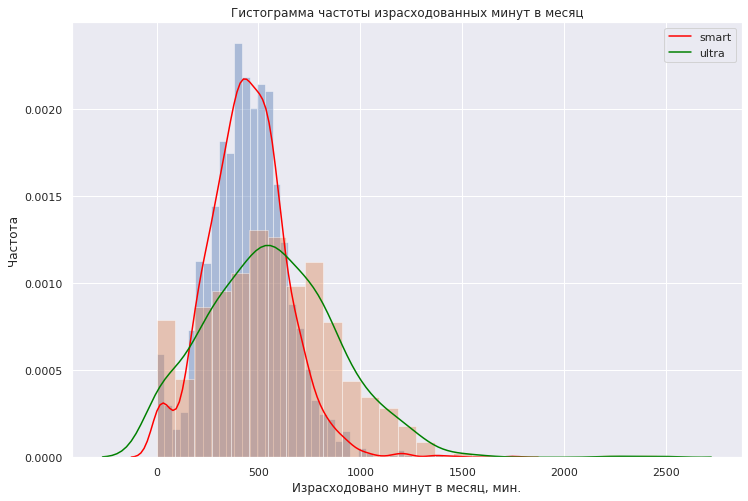

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.distplot(smart_profit['call_duration'], kde_kws={"color": "red", "label": "smart"})
ax = sns.distplot(ultra_profit['call_duration'], kde_kws={"color": "green", "label": "ultra"})
ax.set_xlabel('Израсходовано минут в месяц, мин.')
ax.set_ylabel('Частота')
plt.title("Гистограмма частоты израсходованных минут в месяц")
plt.show()

График имеет форму нормального распределения.

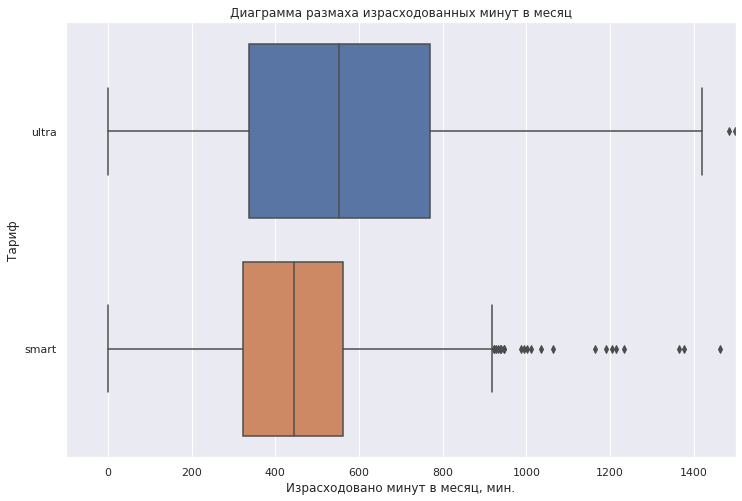

In [109]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="call_duration", y="tariff", data=count_profit)
ax.set(xlim=(-100, 1500))
ax.set_xlabel('Израсходовано минут в месяц, мин.')
ax.set_ylabel('Тариф')
plt.title("Диаграмма размаха израсходованных минут в месяц")
plt.show()

Гистограмма и диаграмма размаха для количества сообщений в месяц.

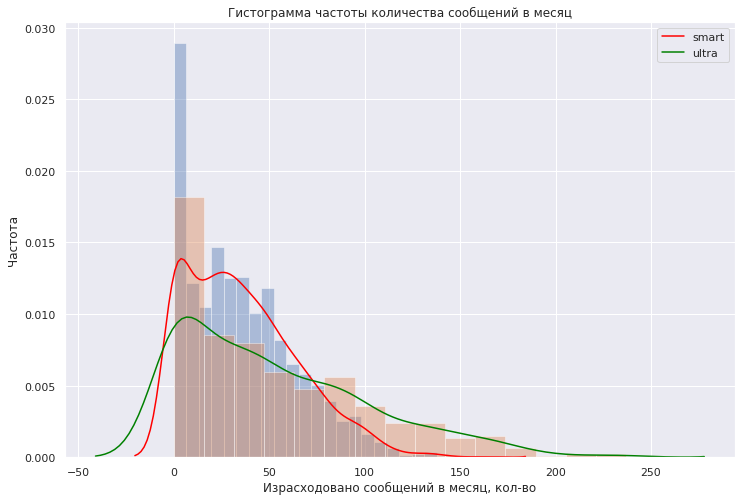

In [110]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(smart_profit['message_count'], kde_kws={"color": "red", "label": "smart"})
ax = sns.distplot(ultra_profit['message_count'], kde_kws={"color": "green", "label": "ultra"})
ax.set_xlabel('Израсходовано сообщений в месяц, кол-во')
ax.set_ylabel('Частота')
plt.title("Гистограмма частоты количества сообщений в месяц")
plt.show()

График скошен вправо и имеет форму распределения пуассона с пиком приближенным к 1.

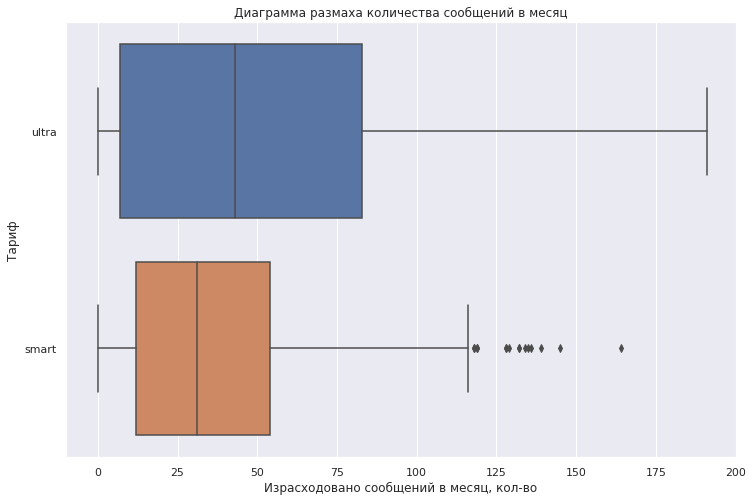

In [111]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="message_count", y="tariff", data=count_profit)
ax.set(xlim=(-10, 200))
ax.set_xlabel('Израсходовано сообщений в месяц, кол-во')
ax.set_ylabel('Тариф')
plt.title("Диаграмма размаха количества сообщений в месяц")
plt.show()

Гистограмма и диаграмма размаха для расхода МБ в месяц.

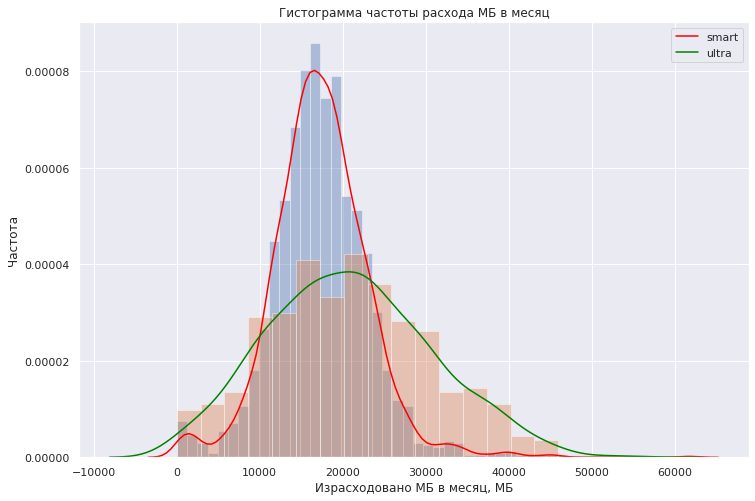

In [112]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(smart_profit['mb_used'], kde_kws={"color": "red", "label": "smart"})
ax = sns.distplot(ultra_profit['mb_used'], kde_kws={"color": "green", "label": "ultra"})
ax.set_xlabel('Израсходовано МБ в месяц, МБ')
ax.set_ylabel('Частота')
plt.title("Гистограмма частоты расхода МБ в месяц")
plt.show()

График имеет форму нормального распределения.

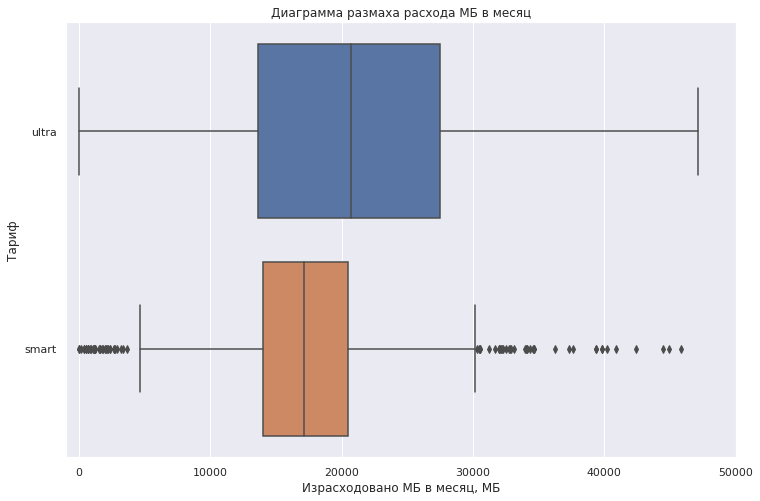

In [113]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="mb_used", y="tariff", data=count_profit)
ax.set(xlim=(-1000, 50000))
ax.set_xlabel('Израсходовано МБ в месяц, МБ')
ax.set_ylabel('Тариф')
plt.title("Диаграмма размаха расхода МБ в месяц")
plt.show()

Построенные гистограммы лишь подтверждают расчётные методы. Средние значения в обоих тарифах очень близки, однако, среднее отклонение у тарифа **ultra** сильно выше. По графикам видно, что при приближении к лимитам по тарифу **smart** резко снижается активность абонентов. Всё объясняется высокими лимитами в тарифе **ultra**, при таких лимитах абонент не беспокоится за вероятную переплату.

## 4 Проверка гипотез

### 4.1 Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

Сформируем двухстороннюю нулевую гипотезу. **H₀** всегда формулируется так, чтобы использовать знак равенства.

**H₀** – средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Исходя из **H₀** формулируем альтернативную гипотезу **H₁**.

**H₁** – средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

<font color='purple'>Импортируем scipy.</font>

In [114]:
from scipy import stats as st

In [115]:
# принимаем за сравниваемое значение среднюю выручка тарифа ultra
optimal_value = ultra_profit.total_profit.mean()

# устанавливаем пороговое значение 5%
alpha = 0.05

results = st.ttest_1samp(
    smart_profit['total_profit'], 
    optimal_value)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.500643691643004e-157
Отвергаем нулевую гипотезу


Вероятность их равенства крайне мала. Заодно проверим, что средняя выручка тарифа **ultra** выше тарифа **smart**.

**Н₂** – средняя выручка пользователей тарифа «Смарт» ниже тарифа «Ультра».

In [116]:
print('p-значение: ', results.pvalue/2)

if (results.pvalue / 2 < alpha) and (smart_profit['total_profit'].mean() < optimal_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.50321845821502e-158
Отвергаем нулевую гипотезу


С высокой долей вероятности выручка трифа **ultra** выше тарифа **smart**.

👍

### 4.2 Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Сформируем двухстороннюю нулевую гипотезу. H₀ всегда формулируется так, чтобы использовать знак равенства.

**H₀** – средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Исходя из **H₀** формулируем альтернативную гипотезу **H₁**.

**H₁** – средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [117]:
# принимаем за сравниваемое значение среднюю выручка по регионам России
optimal_value = count_profit.query('city != "Москва"').total_profit.mean()

# устанавливаем пороговое значение 5%
alpha = 0.05

results = st.ttest_1samp(
    count_profit.query('city == "Москва"')['total_profit'], 
    optimal_value)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.630009513385175
Не получилось отвергнуть нулевую гипотезу


Вероятность их равенства очень велика. Скорее всего средняя выручка пользователей Москвы и регионов не отличается.

## 5 Общий вывод

По итогам проделанной работы можно сделать следующие выводы.

Оценочные данные:
* в большинстве случаев абоненты не превышают установленные лимиты.

Для тарифа **smart**:
* среднее количество минут разговора равно 446.503, среднее отклонение равно 192.933;
* среднее количество отправленных сообщений равно 35.6383, среднее отклонение равно 28.8764;
* среднее количество использованного траффик равно 17347.3 МБ, среднее отклонение равно 5759.87 МБ.

Для тарифа **ultra**:
* среднее количество минут разговора равно 566.162, среднее отклонение равно 321.723;
* среднее количество отправленных сообщений равно 52.7039, среднее отклонение равно 49.5382;
* среднее количество использованного траффик равно 20842.1 МБ, среднее отклонение равно 9818.15 МБ.


Результаты анализа:
* разброс минут разговора, сообщений и трафика у тарифа **ultra** сильно выше;
* при приближении к лимитам по тарифу **smart** резко снижается активность абонентов;
* с высокой долей вероятности выручка трифа **ultra** выше тарифа **smart**;
* с высокой вероятностью средняя выручка пользователей Москвы и регионов не отличается. 